In [1]:
import os
from google.colab import drive

drive.mount('/content/drive')

os.chdir('/content/drive/My Drive/ZUM/Project 1/Основний варіант/')

print(os.listdir('/content/drive/My Drive/ZUM/Project 1/Основний варіант/'))

import pandas as pd

Mounted at /content/drive
['anime_no_index.csv', 'anime', 'war', 'task1_1.ipynb', 'task_1_1_result.csv', 'task_1_1_result.gsheet', 'task_1_2_word2vec.model', 'task_1_2_word2vec.model.wv.vectors.npy', 'task_1_2_word2vec.model.syn1neg.npy', 'task_1_2_sentiment_dictionary.csv', 'task1_2.ipynb', 'task_1_2_labeled_data.csv', 'task2_1.ipynb', 'task4_1.ipynb', 'task_1_2_labeled_data.gsheet']


In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.text import Tokenizer
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.utils import pad_sequences, to_categorical
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('task_1_2_labeled_data.csv')
df.rename(columns={'Tweet':'text', 'prediction':'label'}, inplace=True)
df.sample(10)

,text,label
163462,saitamagoate lesbokomaeda favorite wish anime ...,1
172270,necromante mais forte porto cu,0
205838,copapistao de qual tipo eu gosto de todas mas ...,0
111355,quero fazer live mais preciso algo que anime b...,0
111697,espero estar vivo pra ver parte 7 de jojo adap...,0
153199,otonari ni ginga 06,0
42271,basiilleaf need watch anime you re make,1
191611,qrt 1 comfort book 2 comfort showmovieanime 3 ...,1
187691,i m go to play ovw week bc do not hanzo bp ski...,1
39380,esteblegentil kenzito10 le manga est 100 fois ...,1


In [4]:
max_words = 5000
max_lenght = 200

In [5]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
tweets = pad_sequences(sequences, maxlen=max_lenght)

In [6]:
labels = to_categorical(df['label'], num_classes=2)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.1, stratify=labels, random_state=42)

In [10]:
model = Sequential()
model.add(layers.Embedding(max_words, 30, input_length=max_lenght))
model.add(layers.Conv1D(30, 4, activation="relu"))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(60, 4, activation="relu"))
model.add(layers.MaxPooling1D(pool_size=2))


model.add(layers.GlobalAvgPool1D())
model.add(layers.Dense(2, activation="softmax"))
model.compile(optimizer="rmsprop",
               loss="categorical_crossentropy",
               metrics=["accuracy"])
history = model.fit(X_train,
                      y_train,
                      epochs=10,
                      validation_data=(X_test, y_test))

Epoch 1/10
6086/6086 [==============================] - 60s 10ms/step - loss: 0.1747 - accuracy: 0.9436 - val_loss: 0.1234 - val_accuracy: 0.9608
Epoch 2/10
6086/6086 [==============================] - 36s 6ms/step - loss: 0.1209 - accuracy: 0.9622 - val_loss: 0.1174 - val_accuracy: 0.9638
Epoch 3/10
6086/6086 [==============================] - 36s 6ms/step - loss: 0.1147 - accuracy: 0.9644 - val_loss: 0.1151 - val_accuracy: 0.9647
Epoch 4/10
6086/6086 [==============================] - 36s 6ms/step - loss: 0.1119 - accuracy: 0.9658 - val_loss: 0.1112 - val_accuracy: 0.9657
Epoch 5/10
6086/6086 [==============================] - 34s 6ms/step - loss: 0.1102 - accuracy: 0.9663 - val_loss: 0.1104 - val_accuracy: 0.9659
Epoch 6/10
6086/6086 [==============================] - 43s 7ms/step - loss: 0.1085 - accuracy: 0.9665 - val_loss: 0.1096 - val_accuracy: 0.9666
Epoch 7/10
6086/6086 [==============================] - 36s 6ms/step - loss: 0.1065 - accuracy: 0.9674 - val_loss: 0.1091 - val_a

In [11]:
!pip install plot_keras_history

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9457 sha256=cb171805b9f70c625dfdfff615cf407602d01824541ec129c0939d18aa82a0b4
  Stored in directory: /root/.cache/pip/wheels/2f/31/6c/bbc9703b7baa8bd3802a8aedd9e2f9e66941b0cf0d456ab4cc
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.50-py3-none-any.whl size=320501 sha256=c8d39b2229028d734e684f9f88556dcd25f25320a355f07a01c419f630475935
  Stored in directory: /root/.cache/pip/wheels/b7/f3/5d/748143833c99806921d4e1182c248876b83464746ef1e46f1d
  Created wheel for support_developer: filename=support_developer-1.0.5-py3-none-any.whl siz

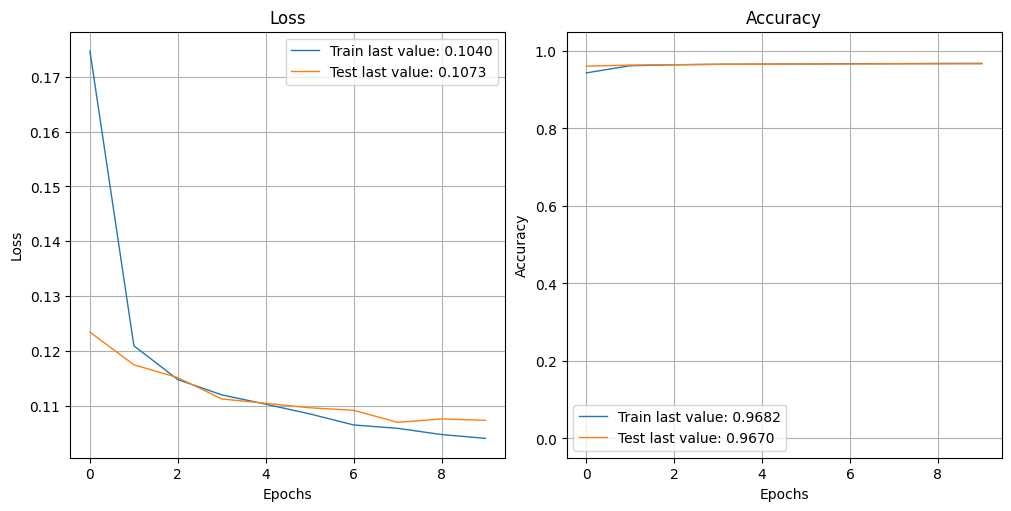

In [12]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

show_history(history)
plot_history(history)
plt.close()